# [Контест](https://www.kaggle.com/competitions/classification-of-oil-and-gas) на Kaggle

Нефтегазовая отрасль промышленности имеет несколько важных особенностей, которые обуславливают необходимость поиска инновационных решений – это непрерывность и высокая сложность технологической цепи, которая начинается с геологической разведки, а заканчивается доставкой нефти и газа потребителям.

Сектор разведки и добычи включает в себя поиск рентабельных залежей нефти и газа на берегу и в море, бурение поисковоразведочных скважин и эксплуатацию скважин, дающих нефть, газ и жидкие продукты залежей или их смесь.

Алгоритмы машинного обучения могут быть полезны для решения различных задач в нефтегазовой отрасли, в частности для построения прогнозов разработки новых рентабельных месторождений.

В данном соревновании необходимо реализовать логистическую регрессию, которая сможет предсказывать место yf (`Onshore/Offshore`).

In [787]:
%pip install opendatasets
import opendatasets as od

In [788]:
od.download_kaggle_dataset("https://www.kaggle.com/competitions/classification-of-oil-and-gas/data", "")


Skipping, found downloaded files in "classification-of-oil-and-gas" (use force=True to force download)


## Данные: анализ и обработка

In [789]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, OneHotEncoder

In [790]:
train_df = pd.read_csv("classification-of-oil-and-gas/train_oil.csv")

test_df = pd.read_csv("classification-of-oil-and-gas/oil_test.csv")
test_df["Onshore/Offshore"] = pd.NA

target_column = "Onshore/Offshore"

In [791]:
df = pd.concat([train_df, test_df])

train_mask = df[target_column].notna()
test_mask = df[target_column].isna()

In [792]:
print(len(df))
df

442


,Field name,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
0,ZHIRNOV,MELEKESKIAN,RUSSIA,FORMER SOVIET UNION,VOLGA-URAL,COMPRESSION/EVAPORITE,51.0000,44.8042,NIZHNEVOLZHSKNET,ONSHORE,OIL,DECLINING PRODUCTION,FORELAND,1870,CARBONIFEROUS,SANDSTONE,262.0,33.0,24.0,30.0
1,LAGOA PARDA,LAGOA PARDA (URUCUTUCA),BRAZIL,LATIN AMERICA,ESPIRITO SANTO,EXTENSION,-19.6017,-39.8332,PETROBRAS,ONSHORE,OIL,NEARLY DEPLETED,PASSIVE MARGIN,4843,PALEOGENE,SANDSTONE,2133.0,72.0,23.0,350.0
2,ABQAIQ,ARAB D,SAUDI ARABIA,MIDDLE EAST,THE GULF,COMPRESSION/EVAPORITE,26.0800,49.8100,SAUDI ARAMCO,ONSHORE,OIL,REJUVENATING,FORELAND,6050,JURASSIC,LIMESTONE,250.0,184.0,21.0,410.0
3,MURCHISON,BRENT,UK /NORWAY,EUROPE,NORTH SEA NORTHERN,EXTENSION,61.3833,1.7500,CNR,OFFSHORE,OIL,NEARLY DEPLETED,RIFT,8988,JURASSIC,SANDSTONE,425.0,300.0,22.0,750.0
4,WEST PEMBINA,NISKU (PEMBINA L POOL),CANADA,NORTH AMERICA,WESTERN CANADA,COMPRESSION,53.2287,-115.8008,NUMEROUS,ONSHORE,OIL,UNKNOWN,FORELAND,9306,DEVONIAN,DOLOMITE,233.0,167.0,11.8,1407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,YIHEZHUANG,MAJIAGOU-BADOU,CHINA,FAR EAST,BOHAI,EXTENSION,37.9167,118.4333,SINOPEC,NaN,OIL,NEARLY DEPLETED,RIFT,5970,ORDOVICIAN,DOLOMITE,560.0,82.0,2.5,8.4
129,YOWLUMNE,STEVENS,USA,NORTH AMERICA,SAN JOAQUIN,COMPRESSION/STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,35.0461,-119.1904,CASTLE PEAK RESOURCES,NaN,OIL,NEARLY DEPLETED,WRENCH/FOREARC,11100,NEOGENE,THINLY-BEDDED SANDSTONE,200.0,150.0,20.0,75.0
130,ZAOYUAN,KONGDIAN-1 (ZAOBEI BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,NaN,OIL,MATURE PRODUCTION,RIFT,5384,PALEOGENE,SANDSTONE,230.0,69.0,26.7,1872.0
131,ZAOYUAN,KONGDIAN-1 (ZILAITUN BLOCK),CHINA,FAR EAST,BOHAI,EXTENSION,38.2100,117.0600,PETROCHINA,NaN,OIL,DECLINING PRODUCTION,RIFT,4721,PALEOGENE,SANDSTONE,164.0,62.0,23.2,121.0


In [793]:
df.isna().sum()

,0
Field name,0
Reservoir unit,0
Country,40
Region,54
Basin name,46
Tectonic regime,0
Latitude,40
Longitude,46
Operator company,0
Onshore/Offshore,133


In [794]:
df.dtypes

,0
Field name,object
Reservoir unit,object
Country,object
Region,object
Basin name,object
Tectonic regime,object
Latitude,float64
Longitude,float64
Operator company,object
Onshore/Offshore,object


In [795]:
df["Depth"] = df["Depth"].astype("float64")

Характеристики месторождения:
* `Field name` - название месторождения
* `Reservoir unit` - ?
* `Country` - страна расположения
* `Region` - регион расположения
* `Basin name` - название бассейна пород
* `Tectonic regime` - тектонический режим
* `Latitude` - широта
* `Longitude` - долгота
* `Operator company` - название компании
* `Onshore/Offshore` - целевая переменная (ONSHORE - 1, OFFSHORE - 0, ONSHORE-OFFSHORE - 2)
* `Hydrocarbon type` - тип углеводорода
* `Reservoir status` - статус месторождения
* `Structural setting` - структурные свойства
* `Depth` - глубина
* `Reservoir period` - литологический период
* `Lithology` - литология
* `Thickness` - общая толщина
* `Thickness` - эффективная толщина
* `Porosity` - пористость
Permeability – проницаемость

Очевидно, что название бассеина никак не влияет на целевую переменную - **удалим `Field name`** из датасета

In [796]:
df = df.drop(["Field name", "Reservoir unit"], axis=1)

In [797]:
df["Onshore/Offshore"] = df["Onshore/Offshore"].map({
    "OFFSHORE": 0,
    "ONSHORE": 1,
    "ONSHORE-OFFSHORE": 2,
})
df["Onshore/Offshore"].value_counts()

,count
Onshore/Offshore,
1.0,218
0.0,86
2.0,5


Видим наличие 3 классов - придется использовать многоклассовую классификацию.

(*хорошо, что sklearn автоматически реализует OneVSRest стратегию*)

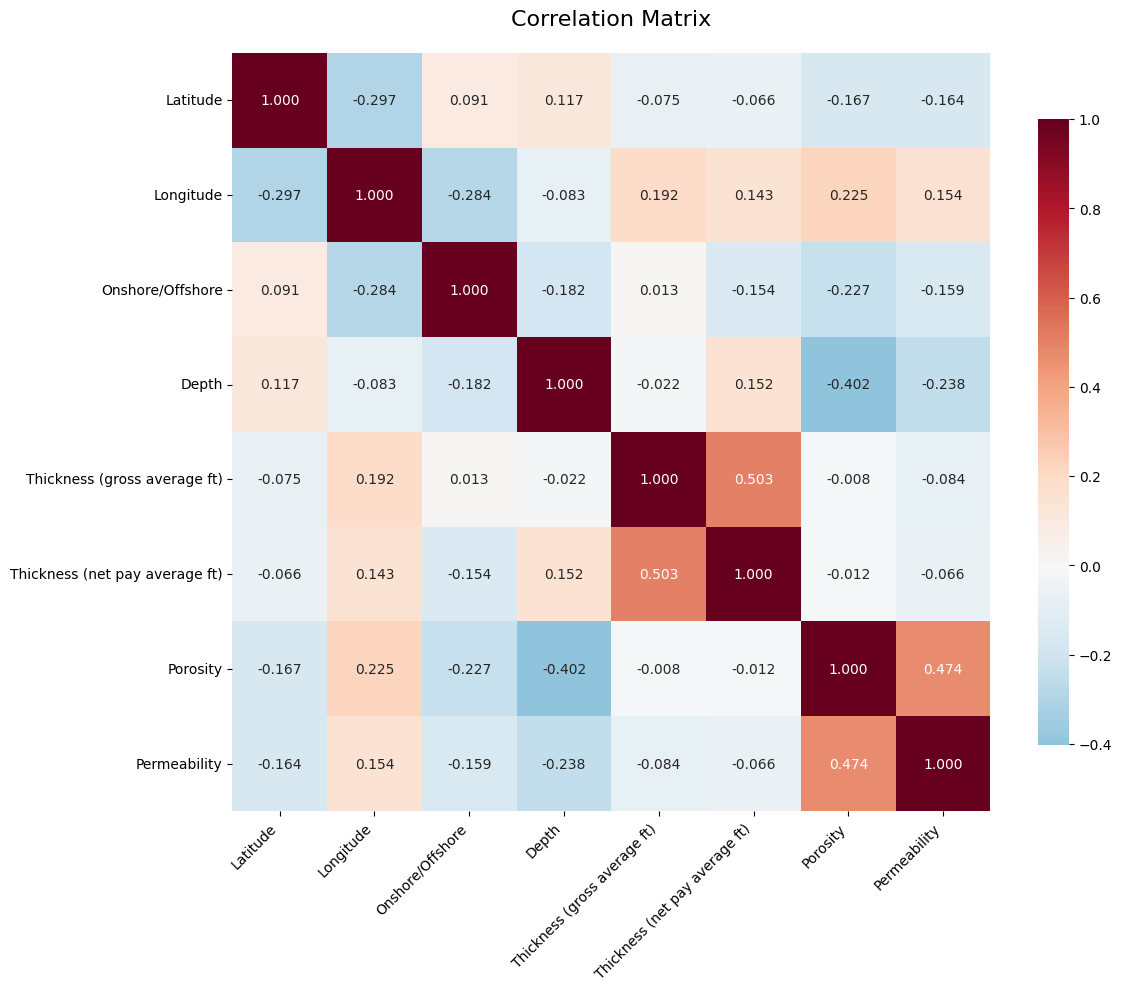

In [798]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap="RdBu_r",
            center=0,
            fmt=".3f",
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})

plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Заполнение пропусков

In [799]:
missing_geoposition = df[df["Country"].isna() | df["Region"].isna() | df['Latitude'].isna() | df['Longitude'].isna()]
missing_geoposition

,Reservoir unit,Country,Region,Basin name,Tectonic regime,Latitude,Longitude,Operator company,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Reservoir period,Lithology,Thickness (gross average ft),Thickness (net pay average ft),Porosity,Permeability
11,BAHARIYA,NaN,NaN,NaN,EXTENSION,NaN,NaN,BAPETCO,1.0,GAS-CONDENSATE,DECLINING PRODUCTION,RIFT,7546.0,CRETACEOUS,SANDSTONE,361.0,148.0,20.00,225.00
12,DAKOTA SANDSTONE (LOWER MEMBER),NaN,NaN,NaN,COMPRESSION/EROSION,NaN,NaN,BTA OIL PRODUCERS,1.0,OIL,NEARLY DEPLETED,FORELAND,15460.0,CRETACEOUS,SANDSTONE,270.0,35.0,12.80,79.00
15,SGIATH-PIPER,NaN,NaN,NaN,EXTENSION/EVAPORITE,NaN,NaN,NEXEN,0.0,OIL,DECLINING PRODUCTION,RIFT,9940.0,JURASSIC,SANDSTONE,360.0,290.0,16.00,100.00
16,BASSEIN (ZONE B),INDIA,NaN,NaN,EXTENSION,18.1720,72.3130,ONGC,0.0,OIL,DECLINING PRODUCTION,PASSIVE MARGIN,4542.0,PALEOGENE,LIMESTONE,230.0,82.0,12.00,0.80
21,HUTTON,AUSTRALIA,NaN,NaN,INVERSION/COMPRESSION/EXTENSION,-28.0000,140.0000,SANTOS,1.0,OIL,PLATEAU PRODUCTION,INTRACRATONIC,5392.0,JURASSIC,SANDSTONE,600.0,50.0,18.00,1000.00
28,THAMAMA ZONE II,NaN,NaN,NaN,GRAVITY/EVAPORITE/COMPRESSION,NaN,NaN,ADMA /ZADCO,0.0,OIL,PLATEAU PRODUCTION,SALT/FORELAND,6940.0,CRETACEOUS,LIMESTONE,145.0,140.0,25.00,30.00
33,UPPER GANCHAIGOU-LOWER YOUSHAS,NaN,NaN,NaN,COMPRESSION,NaN,NaN,PETROCHINA,1.0,OIL,PLATEAU PRODUCTION,THRUST,4199.0,NEOGENE,SANDSTONE,3281.0,81.0,19.00,102.00
35,UNITS XIII-XVIII,NaN,NaN,NaN,INVERSION/COMPRESSION/EXTENSION,NaN,NaN,MANGYSTAUMUNAIGAZ,1.0,OIL,MATURE PRODUCTION,INVERSION/RIFT,3440.0,JURASSIC,SANDSTONE,920.0,436.0,21.00,235.00
37,ULA,NaN,NaN,NaN,INVERSION/COMPRESSION/EXTENSION/EVAPORITE,NaN,NaN,BP,0.0,OIL,MATURE PRODUCTION,SALT/INVERSION/RIFT,10744.0,JURASSIC,SANDSTONE,410.0,377.0,16.50,300.00
40,YATES,USA,NaN,NaN,COMPRESSION,31.5777,-102.9918,WHITING OIL and GAS,1.0,OIL,REJUVENATING,FORELAND,2600.0,PERMIAN,SILTSTONE,300.0,100.0,11.00,16.00


Заполним пропуски `Country` по `Region`, пропуски в `Region` по `Country`, потом `Latitude`/`Longitude` по `Country`/`Region`

In [800]:
# Заполняем `Country`
country_by_region = df.groupby("Region")["Country"].apply(
    lambda x: x.mode()[0]
)
for region in country_by_region.index:
    mask = (df["Region"] == region) & (df["Country"].isna())
    df.loc[mask, "Country"] = country_by_region[region]

most_common_country = df["Country"].mode()
df["Country"] = df["Country"].fillna(most_common_country[0])

# Заполняем `Region`
region_by_country = df.groupby("Country")["Region"].apply(
    lambda x: x.mode()[0]
)
for country in region_by_country.index:
    mask = (df["Country"] == country) & (df["Region"].isna())
    df.loc[mask, "Region"] = region_by_country[country]

most_common_region = df["Region"].mode()
df["Region"] = df["Region"].fillna(most_common_region[0])

# Заполняем `Latitude`/`Longitude`
region_country_coords = df.groupby(["Region", "Country"])[["Latitude", "Longitude"]].mean()
for idx in region_country_coords.index:
    mask = (
        (df["Region"] == idx[0]) &
        (df["Country"] == idx[1]) &
        (df["Latitude"].isna() | df["Longitude"].isna())
    )
    df.loc[mask, "Latitude"] = region_country_coords.loc[idx, "Latitude"]
    df.loc[mask, "Longitude"] = region_country_coords.loc[idx, "Longitude"]

df["Latitude"] = df["Latitude"].fillna(df["Latitude"].mean())
df["Longitude"] = df["Longitude"].fillna(df["Longitude"].mean())

In [801]:
df.loc[train_mask, "Latitude"] = df.loc[train_mask, "Latitude"].fillna(df.loc[train_mask, "Latitude"].mean())
df.loc[train_mask, "Longitude"] = df.loc[train_mask, "Longitude"].fillna(df.loc[train_mask, "Longitude"].mean())

df.loc[test_mask, "Latitude"] = df.loc[test_mask, "Latitude"].fillna(df.loc[train_mask, "Latitude"].mean())
df.loc[test_mask, "Longitude"] = df.loc[test_mask, "Longitude"].fillna(df.loc[train_mask, "Longitude"].mean())

In [802]:
df.isna().sum()

,0
Reservoir unit,0
Country,0
Region,0
Basin name,46
Tectonic regime,0
Latitude,0
Longitude,0
Operator company,0
Onshore/Offshore,133
Hydrocarbon type,0


### Масштабирование данных

In [803]:
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns.drop(target_column)

scaler = StandardScaler()
df.loc[train_mask, numeric_columns] = scaler.fit_transform(df.loc[train_mask, numeric_columns])
df.loc[test_mask, numeric_columns] = scaler.transform(df.loc[test_mask, numeric_columns])

### Кодирование категориальных данных

In [804]:
categorial_columns = df.select_dtypes(include=["object"]).columns.tolist()

for column in categorial_columns:
    print(f"Столбец: {column}")
    counts = df[column].value_counts()
    for value, count in counts.items():
        print(f"  {value} : {count}")
    print("-"*50)

Столбец: Reservoir unit
  BRENT : 9
  SAN ANDRES : 8
  SHUAIBA : 5
  ARAB D : 5
  LEMAN SANDSTONE : 4
  KALOL : 4
  TOR-EKOFISK : 4
  UNNAMED : 4
  RED SERIES : 4
  STATFJORD : 3
  MISSION CANYON (MADISON) : 3
  ARAB C : 3
  GRAYBURG : 3
  SMACKOVER : 3
  LEDUC : 3
  BAHARIYA : 3
  SHAHEJIE : 2
  HALFWAY : 2
  KHUFF : 2
  PARADOX (DESERT CREEK) : 2
  VERMELHA : 2
  HUANGLONG : 2
  PARFENOV : 2
  MACAE (QUISSAMA) : 2
  COTTON VALLEY LIME : 2
  BATURAJA : 2
  FANGST : 2
  LATROBE (M1 UNIT) : 2
  VIKING : 2
  SWAN HILLS : 2
  WUMISHAN : 2
  LOWER BAHARIYA : 2
  CARAPEBUS : 2
  PALUXY : 2
  SPEARFISH : 2
  TENSLEEP : 2
  NUBIA C : 2
  LANSING-KANSAS CITY : 2
  UWAINAT : 2
  GUANTAO : 2
  ABO : 2
  LOWER HACKBERRY (FRIO) : 2
  CHARLES : 2
  MUDDY : 2
  CHARLES (MIDALE BEDS) : 2
  CLEVELAND : 2
  TURNER VALLEY : 2
  WOODBINE : 2
  HUECO : 2
  UPPER MINNELUSA (B SAND) : 2
  FULMAR : 2
  PHOSPHORIA (ERVAY) : 2
  DAKOTA SANDSTONE (LOWER MEMBER) : 2
  HANIFA : 1
  AVALON (SOUTH POOL) : 1
  WICHI

In [805]:
onehot_columns = [
    "Country",
    "Region",
    "Basin name",
    "Hydrocarbon type",
    "Reservoir status",
    "Reservoir period",
    "Lithology"
]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_array = encoder.fit_transform(df[onehot_columns])

feature_names = []
for i, col in enumerate(onehot_columns):
    for category in encoder.categories_[i]:
        feature_names.append(f"{col}_{category}")

encoded_df = pd.DataFrame(
    encoded_array,
    columns=feature_names,
    index=df.index
)

df = df.drop(onehot_columns, axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [806]:
multi_label_columns = [
    ("Tectonic regime", "Tectonic"),
    ("Structural setting", "Structural"),
    ("Operator company", "Operator")
]

for original_col, prefix in multi_label_columns:
    split_col = f"{original_col}_split"
    df[split_col] = df[original_col].astype(str).str.split("/")

    mlb = MultiLabelBinarizer()
    encoded_array = mlb.fit_transform(df[split_col])

    encoded_df = pd.DataFrame(
        encoded_array,
        columns=[f"{prefix}_{c}" for c in mlb.classes_],
        index=df.index
    )

    df = pd.concat([df, encoded_df], axis=1, ignore_index=False)
    df = df.drop([original_col, split_col], axis=1)

In [807]:
df.columns

Index(['Latitude', 'Longitude', 'Onshore/Offshore', 'Depth',
       'Thickness (gross average ft)', 'Thickness (net pay average ft)',
       'Porosity', 'Permeability', 'Country_AFGHANISTAN', 'Country_ALGERIA',
       ...
       'Operator_WESTCOAST PETROLEUM', 'Operator_WHITING OIL and GAS',
       'Operator_WILDFIRE PARTNERS INC', 'Operator_WILLIAMS',
       'Operator_WOODSIDE', 'Operator_WOODSIDE ENERGY',
       'Operator_YAKUTGASPROM', 'Operator_YATES PETROLEUM AND OTHERS',
       'Operator_YUGANSKNEFTEGAS ', 'Operator_ZADCO'],
      dtype='object', length=808)

## Логистическая регрессия

In [808]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report

In [809]:
train_df = df[df[target_column].notna()]
test_df = df[df[target_column].isna()]

numeric_columns = train_df.select_dtypes(include=["int64", "float64"]).columns.drop(target_column)

X_train = train_df[numeric_columns]
y_train = train_df[target_column]
X_test = test_df[numeric_columns]

In [810]:
model = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=0
)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [812]:
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)

f1_train = f1_score(y_train, y_train_pred, average="weighted")
accuracy_train = (y_train == y_train_pred).mean()

print(f"\nРезультаты на тренировочных данных:")
print(f"F1-score: {f1_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")

print("\nОтчет по классификации:")
print(classification_report(y_train, y_train_pred))


Результаты на тренировочных данных:
F1-score: 1.0000
Accuracy: 1.0000

Отчет по классификации:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       218
         2.0       1.00      1.00      1.00         5

    accuracy                           1.00       309
   macro avg       1.00      1.00      1.00       309
weighted avg       1.00      1.00      1.00       309



In [813]:
submission = pd.DataFrame({
    "index": X_test.index,
    "Onshore/Offshore": model.predict(X_test)
})

submission.to_csv("submission.csv", index=False)
submission

,index,Onshore/Offshore
0,0,1.0
1,1,1.0
2,2,1.0
3,3,0.0
4,4,1.0
...,...,...
128,128,1.0
129,129,1.0
130,130,1.0
131,131,1.0
